## 모델 평가의 개념

- 회귀모델
    - 실제 값과의 에러치를 가지고 계산
- 이진 분류
    - Accuracy : $\frac{TP + TN}{TP + TN + FP + FN}$

    - Precision : $\frac{TP}{TP + FP}$

    - Recall: $\frac{TP}{TP + FN}$

    - Fall-out: $\frac{FP}{FP + TN}$

- 분류모델
    - 결과를 속할 비율(확률)을 반환한다.
    - threshold(한계점)를 변경하면서 모델 평가 지표 관찰
    - 실제 양성인 데이터를 음성으로 판단하면 안되는 경우라면, Recall이 중요
    - 실제 음성인 데이터를 양성이라고 판단하면 안되는 경우라면, Precision이 중요
    - Recall과 Precision은 서로 영향을 주기 때문에 한 쪽을 극단적으로 높게 설정해서는 안됨

- F1 - Score
    - $\frac{2 * Precision * Recall}{(Precision + Recall)}$
    - Recall과 Precision을 결합한 지표
    - 둘다 높은 값을 가질 수록 높은 값을 가짐



## ROC와 AUC

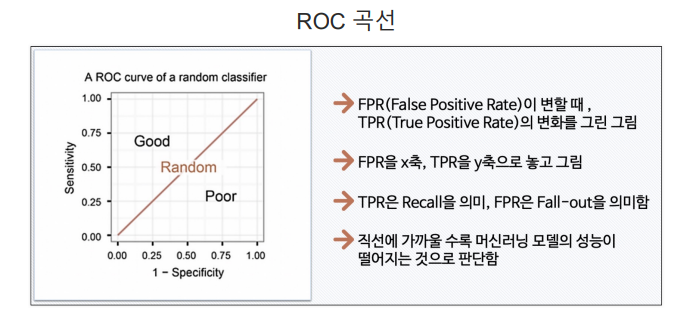

#### ROC 커브 그려보기

In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade>5 else 0. for grade in wine["quality"]]

X = wine.drop(['taste','quality'], axis=1)
y = wine["taste"]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 13, stratify=y)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7371560515682124
Test Acc :  0.7276923076923076


In [3]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve)

print('Accuracy : ', accuracy_score(y_test, y_pred_test))
print('Recall : ', recall_score(y_test, y_pred_test))
print('Precision : ', precision_score(y_test, y_pred_test))
print('AUC Score : ', roc_auc_score(y_test, y_pred_test))
print('F1 Score : ', f1_score(y_test, y_pred_test))

Accuracy :  0.7276923076923076
Recall :  0.7849331713244229
Precision :  0.7849331713244229
AUC Score :  0.706931994467243
F1 Score :  0.7849331713244229


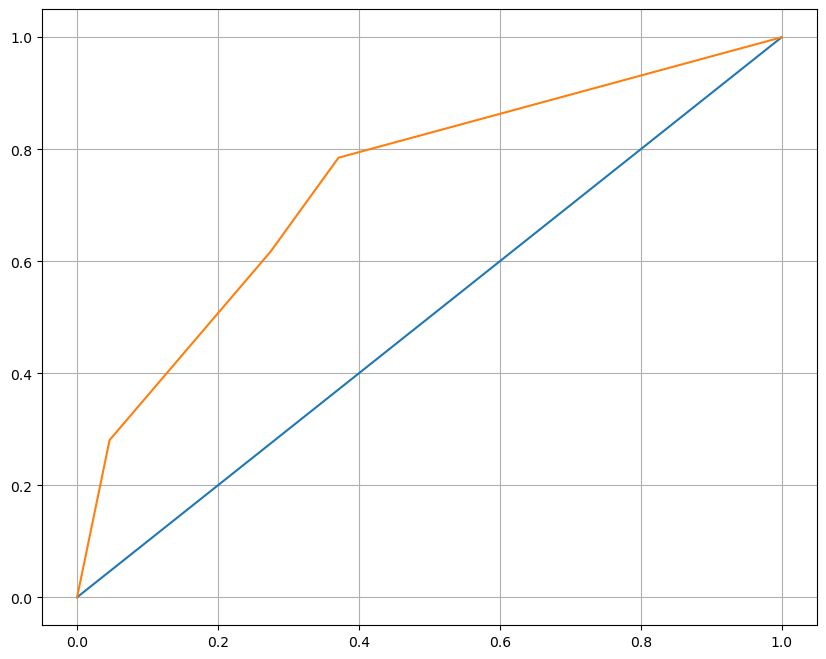

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()

# 수학의 기초 - 함수

### 다항함수

- $f(x) = 3x^2 + 2$

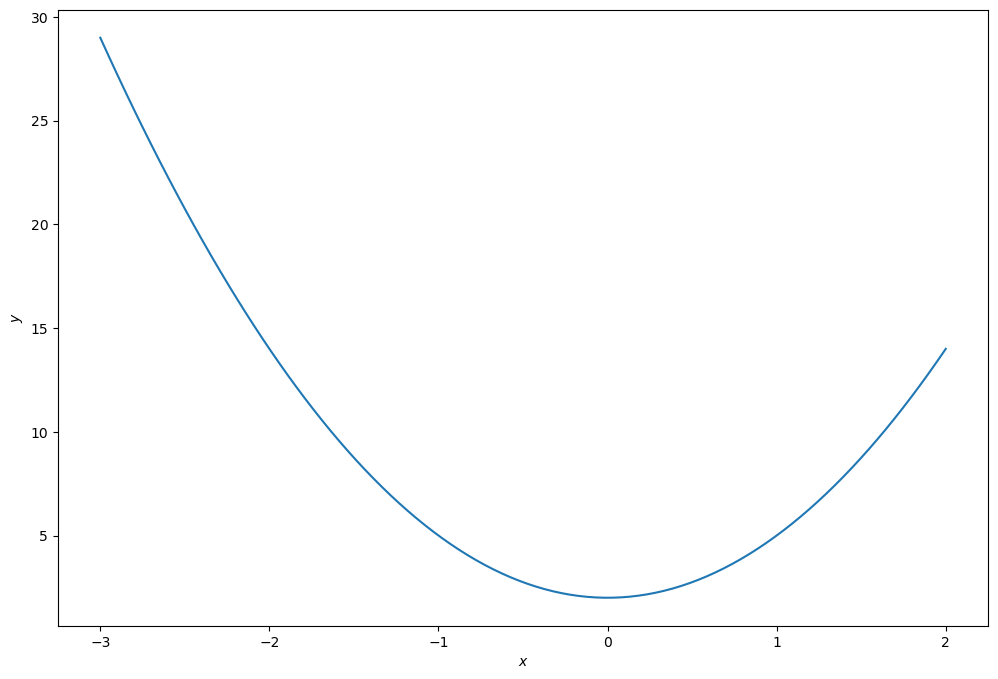

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(-3, 2, 100)
y = 3 * x**2 +2

plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

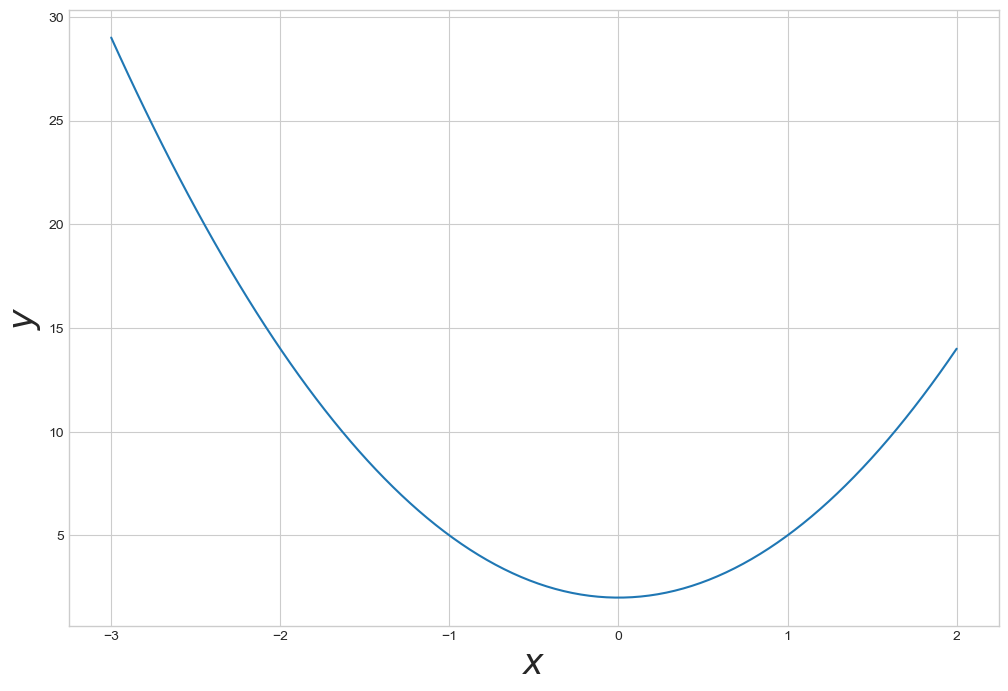

In [8]:
import matplotlib as mpl

mpl.style.use('seaborn-whitegrid')

plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.xlabel('$x$', fontsize= 25)
plt.ylabel('$y$', fontsize= 25)
plt.show()

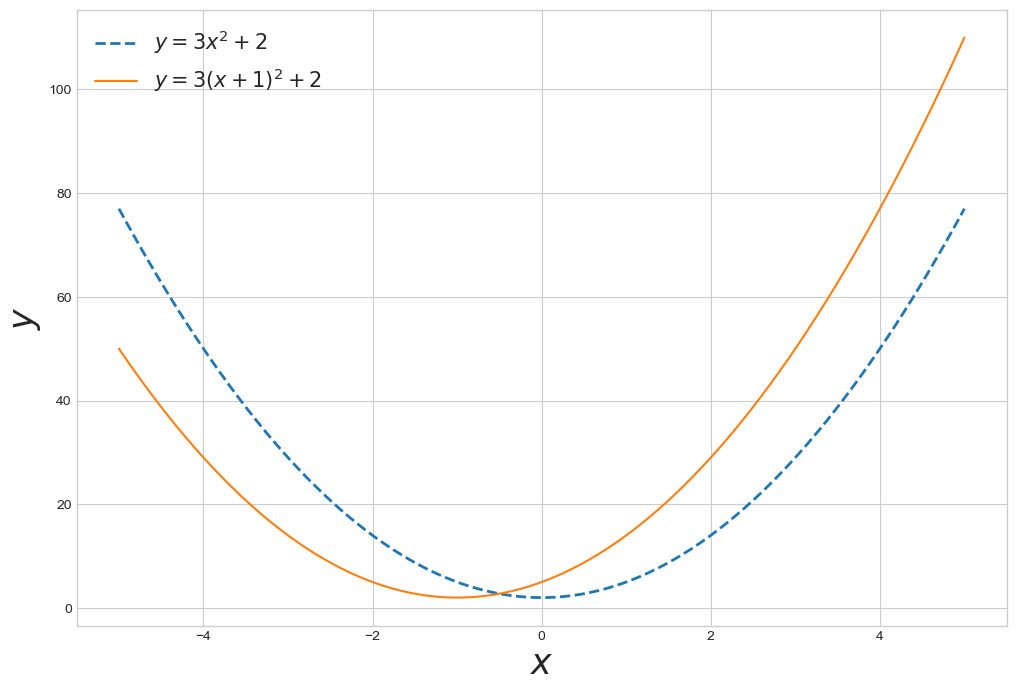

In [9]:
x= np.linspace(-5, 5, 100)
y1 = 3 * x**2 +2
y2 = 3*(x+1)**2 + 2

plt.figure(figsize=(12, 8))
plt.plot(x, y1, lw=2, ls= 'dashed', label='$y = 3x^2 + 2$')
plt.plot(x, y2, label='$y = 3(x+1)^2 + 2$')
plt.legend(fontsize= 15)
plt.xlabel('$x$', fontsize= 25)
plt.ylabel('$y$', fontsize= 25)
plt.show()

- 지수 함수
    - $f(x) = a^x$
    - 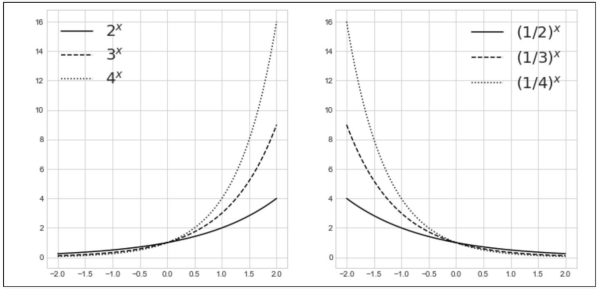

- 로그 함수
    - $f(x) = log_{a}{x}$
    - 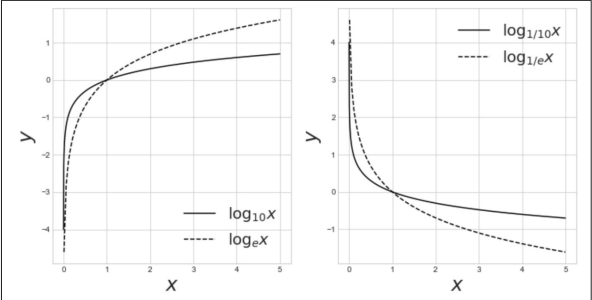

- 시그모이드(Sigmoid)
    - $\sigma(z) = \frac{1}{1 + e^(-z)}$
    - 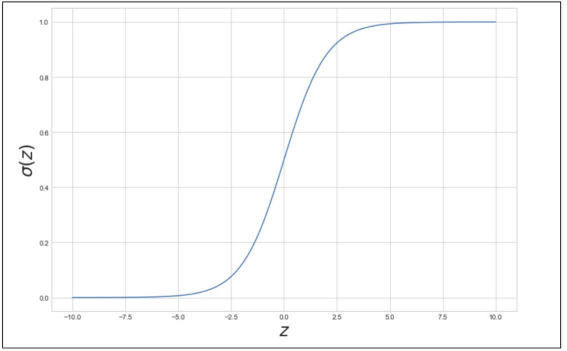

## 함수의 표현

- 백터의 표현
    - 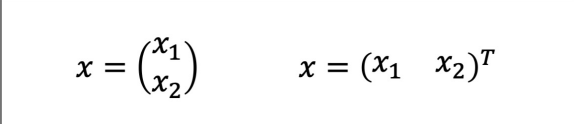
- 단일 변수 스칼라 함수
    - 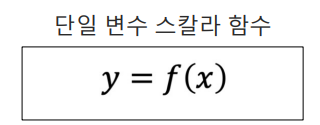
- 다중 변수 스칼라 함수
    - 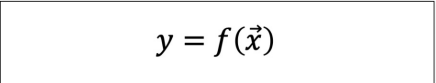
- 다변수 벡터함수
    - 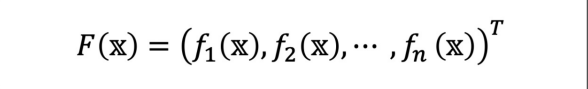


#### 다변수 벡터함수의 예제

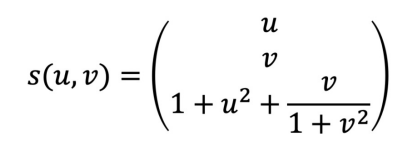

In [10]:
u = np.linspace(0,1,30)
v = np.linspace(0,1,30)
U, V = np.meshgrid(u, v)
X = U
Y = V
Z = (1+U**2) + (V/(1+V**2))

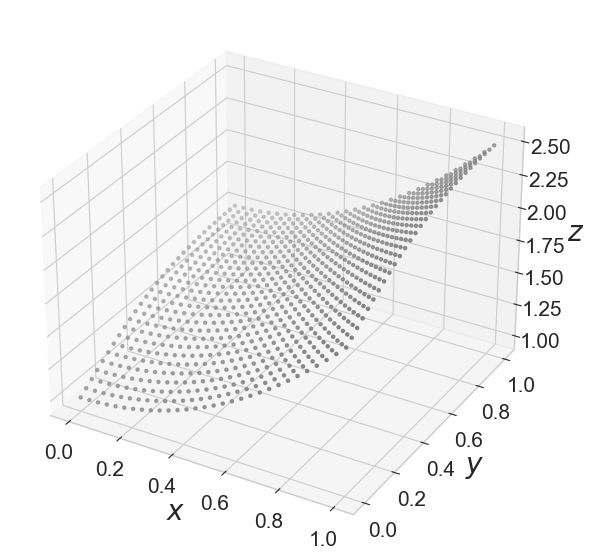

In [14]:
plt.figure(figsize=(7, 7))
ax = plt.axes(projection = '3d')
ax.xaxis.set_tick_params(labelsize= 15)
ax.yaxis.set_tick_params(labelsize= 15)
ax.zaxis.set_tick_params(labelsize= 15)
ax.set_xlabel(r'$x$', fontsize = 20)
ax.set_ylabel(r'$y$', fontsize = 20)
ax.set_zlabel(r'$z$', fontsize = 20)

ax.scatter3D(X, Y, Z, marker='.', color = 'gray')

plt.show()

- 함수의 그래프 방식 표현
    - 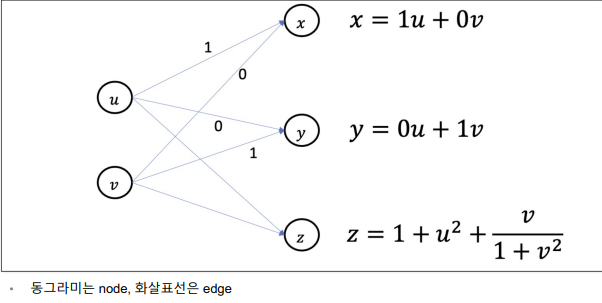

#### 함수의 합성

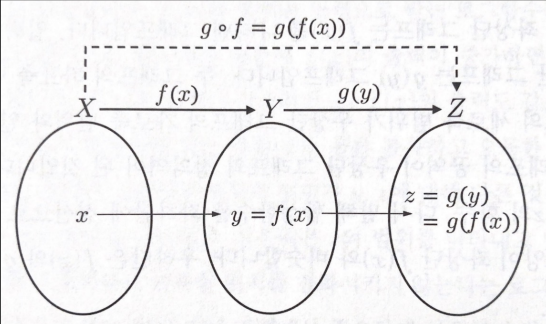

In [15]:
x = np.linspace(-4, 4, 100)
y = x**3 - 15*x + 30
z = np.log(y)

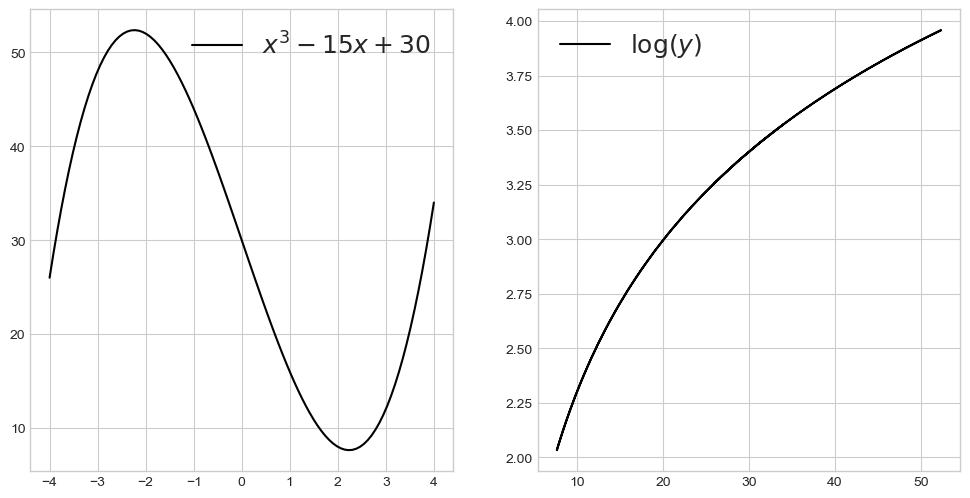

In [17]:
flg, ax = plt.subplots(1,2,figsize = (12,6))

ax[0].plot(x, y, label= r'$x^3 - 15x + 30$', color='k')
ax[0].legend(fontsize = 18)

ax[1].plot(y, z, label= r'$\log(y)$', color='k')
ax[1].legend(fontsize = 18)

plt.show()

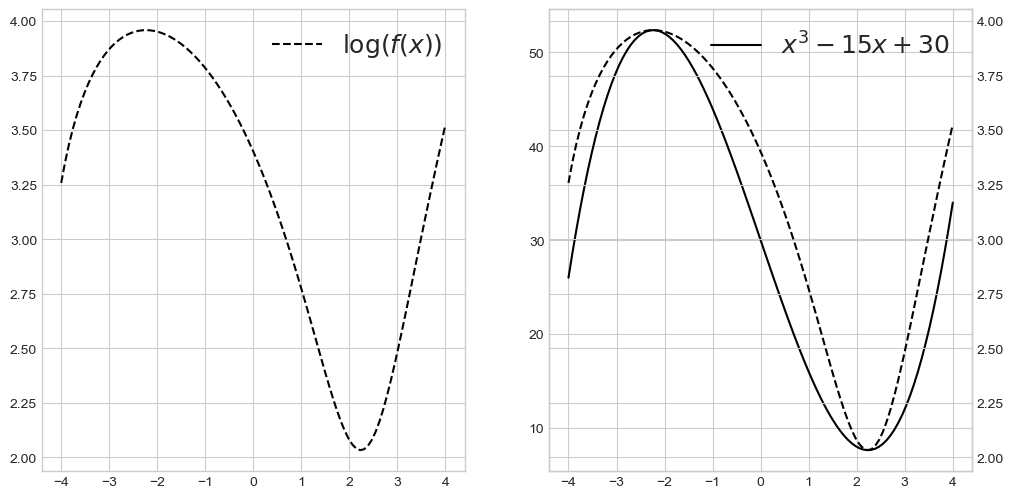

In [21]:
flg, ax = plt.subplots(1,2,figsize = (12,6))

ax[0].plot(x, z, '--', label= r'$\log(f(x))$', color='k')
ax[0].legend(fontsize = 18)

ax[1].plot(x, y, label= r'$x^3 - 15x + 30$', color='k')
ax[1].legend(fontsize = 18)
ax_tmp = ax[1].twinx()
ax_tmp.plot(x, z ,'--', label = r'$\log(f(x))$', color = 'k')

plt.show()

# Box Plot

- Box Plot
     - 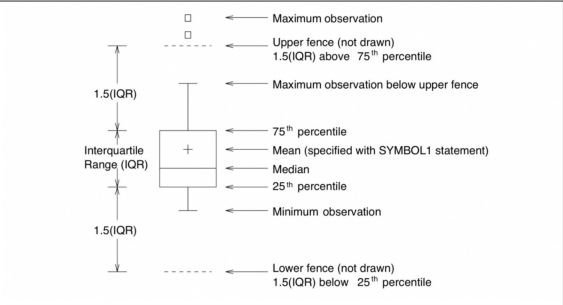

In [22]:
samples = [1,7,9,16,36,39,45,45,46,48,51,100,101]
tmp_y = [1]*len(samples)
tmp_y

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

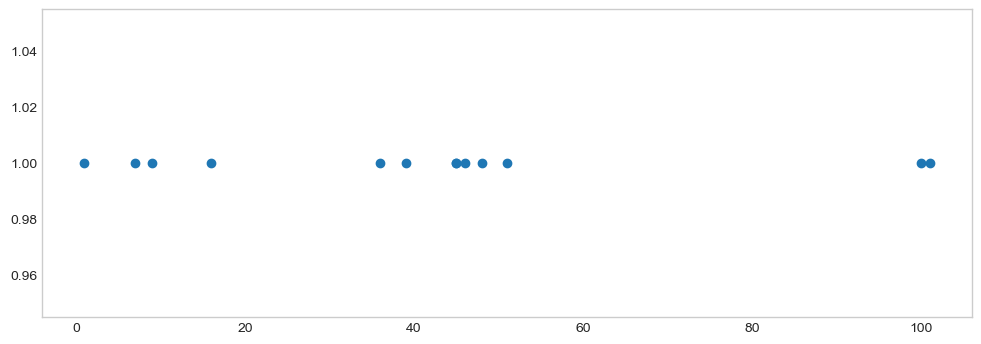

In [23]:
plt.figure(figsize=(12,4))
plt.scatter(samples, tmp_y)
plt.grid()
plt.show()

In [24]:
## 몇몇 지표
np.median(samples)
np.percentile(samples, 25)
np.percentile(samples, 75)
np.percentile(samples, 75) - np.percentile(samples, 25)
iqr = np.percentile(samples, 75) -np.percentile(samples, 25)
iqr*1.5

48.0

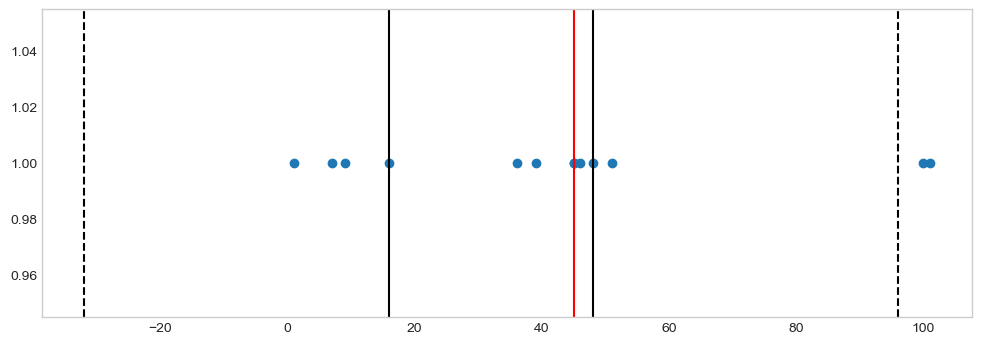

In [25]:
q1 = np.percentile(samples, 25)
q2 = np.median(samples)
q3 = np.percentile(samples, 75)
upper_fence = q3 + iqr*1.5
lower_fence = q1 - iqr*1.5

plt.figure(figsize=(12,4))
plt.scatter(samples, tmp_y)
plt.axvline(x=q1, color = 'black')
plt.axvline(x=q2, color = 'red')
plt.axvline(x=q3, color = 'black')
plt.axvline(x=upper_fence, color = 'black', ls = 'dashed')
plt.axvline(x=lower_fence, color = 'black', ls = 'dashed')

plt.grid()
plt.show()

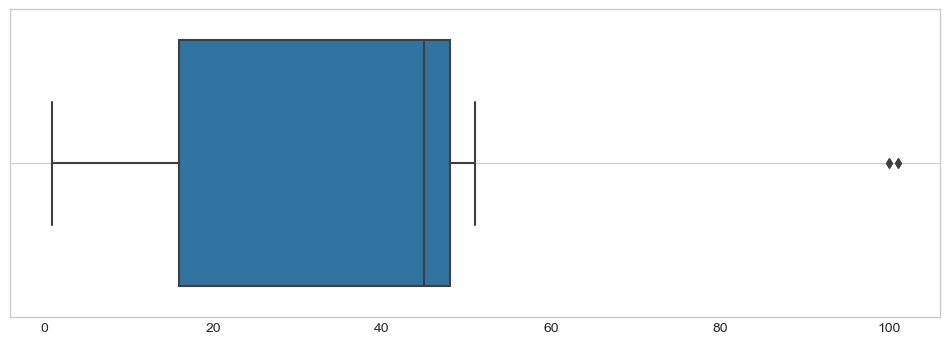

In [27]:
import seaborn as sns

plt.figure(figsize=(12,4))
sns.boxplot(x = samples)
plt.grid()
plt.show()